C:\Users\Jspch\AppData\Local\Temp\ipykernel_19272\2704959117.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


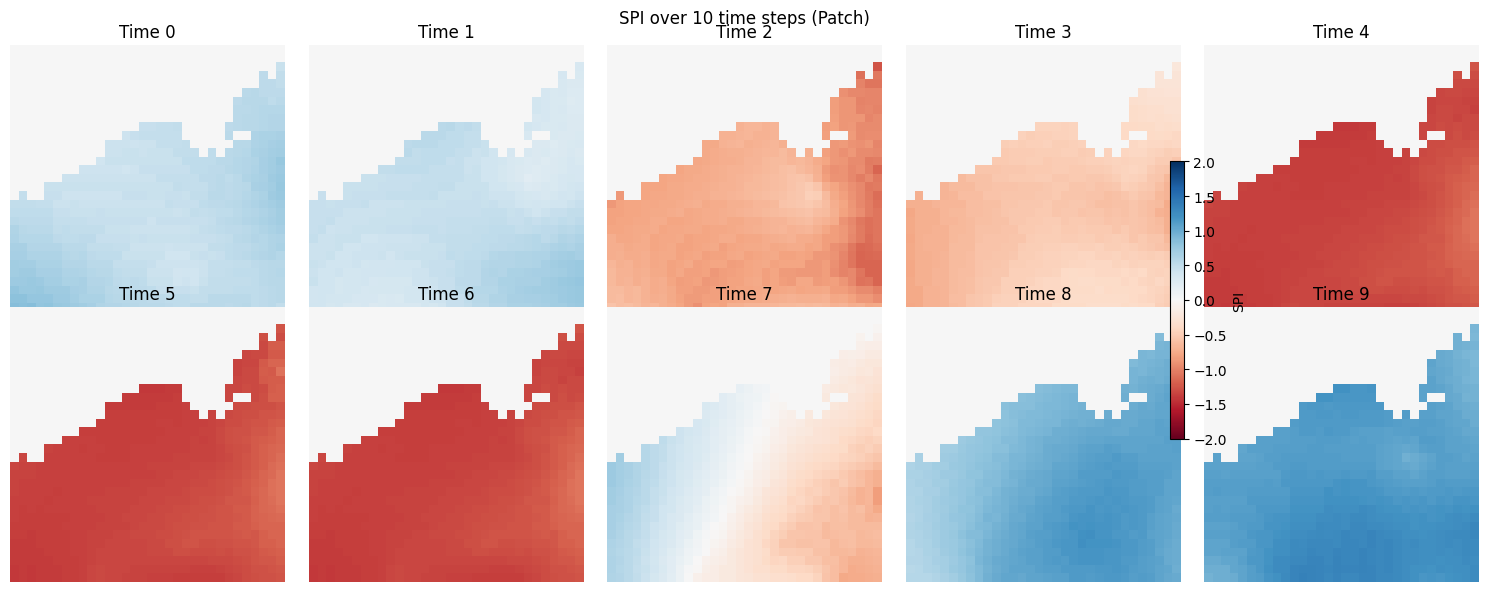

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load one sample
patch = np.load(r"data\sequences\CYP\CYP_lat0_lon16_t2.npy")  # Shape: (10, 32, 32, 10)

# Extract SPI (channel 4)
spi_series = patch[:, :, :, 4]  # Shape: (10, 32, 32)

# Plot each time step
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for t in range(10):
    im = axes[t].imshow(spi_series[t], cmap='RdBu', vmin=-2, vmax=2)
    axes[t].set_title(f"Time {t}")
    axes[t].axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6, label='SPI')
plt.suptitle("SPI over 10 time steps (Patch)")
plt.tight_layout()
plt.show()


C:\Users\Jspch\AppData\Local\Temp\ipykernel_19272\3253265020.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


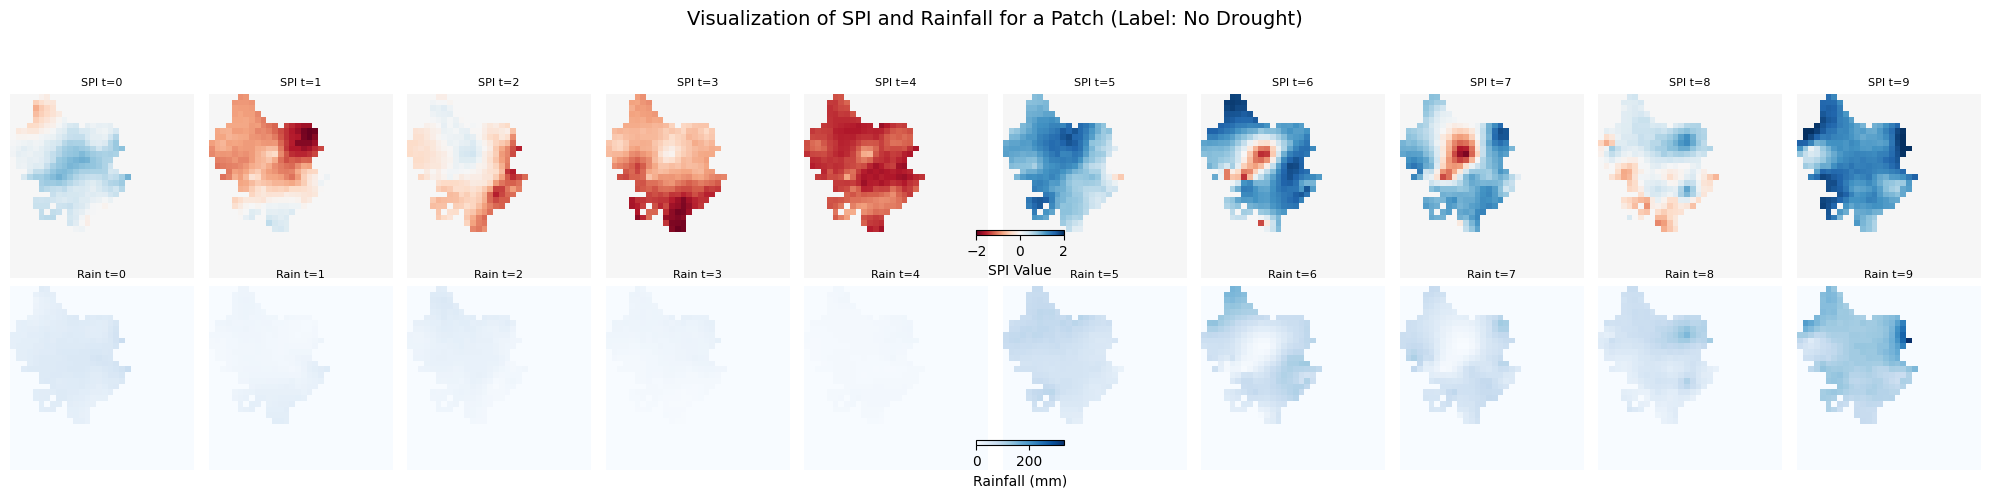

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load sample patch
patch_path = r"data\sequences\NET\NET_lat0_lon0_t4.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract SPI and Rainfall (channels 4 and 0)
spi_series = patch[:, :, :, 4]
rain_series = patch[:, :, :, 0]

# Plotting
fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for t in range(10):
    spi_img = axes[0, t].imshow(spi_series[t], cmap='RdBu', vmin=-2, vmax=2)
    axes[0, t].set_title(f"SPI t={t}", fontsize=8)
    axes[0, t].axis('off')

    rain_img = axes[1, t].imshow(rain_series[t], cmap='Blues', vmin=0, vmax=np.max(rain_series))
    axes[1, t].set_title(f"Rain t={t}", fontsize=8)
    axes[1, t].axis('off')

# Add colorbars
cbar_spi = fig.colorbar(spi_img, ax=axes[0, :], orientation='horizontal', fraction=0.025, pad=0.05)
cbar_spi.set_label("SPI Value")

cbar_rain = fig.colorbar(rain_img, ax=axes[1, :], orientation='horizontal', fraction=0.025, pad=0.05)
cbar_rain.set_label("Rainfall (mm)")

# Add title
drought_text = "Consecutive Drought" if label == 1 else "No Drought"
fig.suptitle(f"Visualization of SPI and Rainfall for a Patch (Label: {drought_text})", fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig_path = "models/patch_visualization.png"
plt.savefig(fig_path)
plt.show()


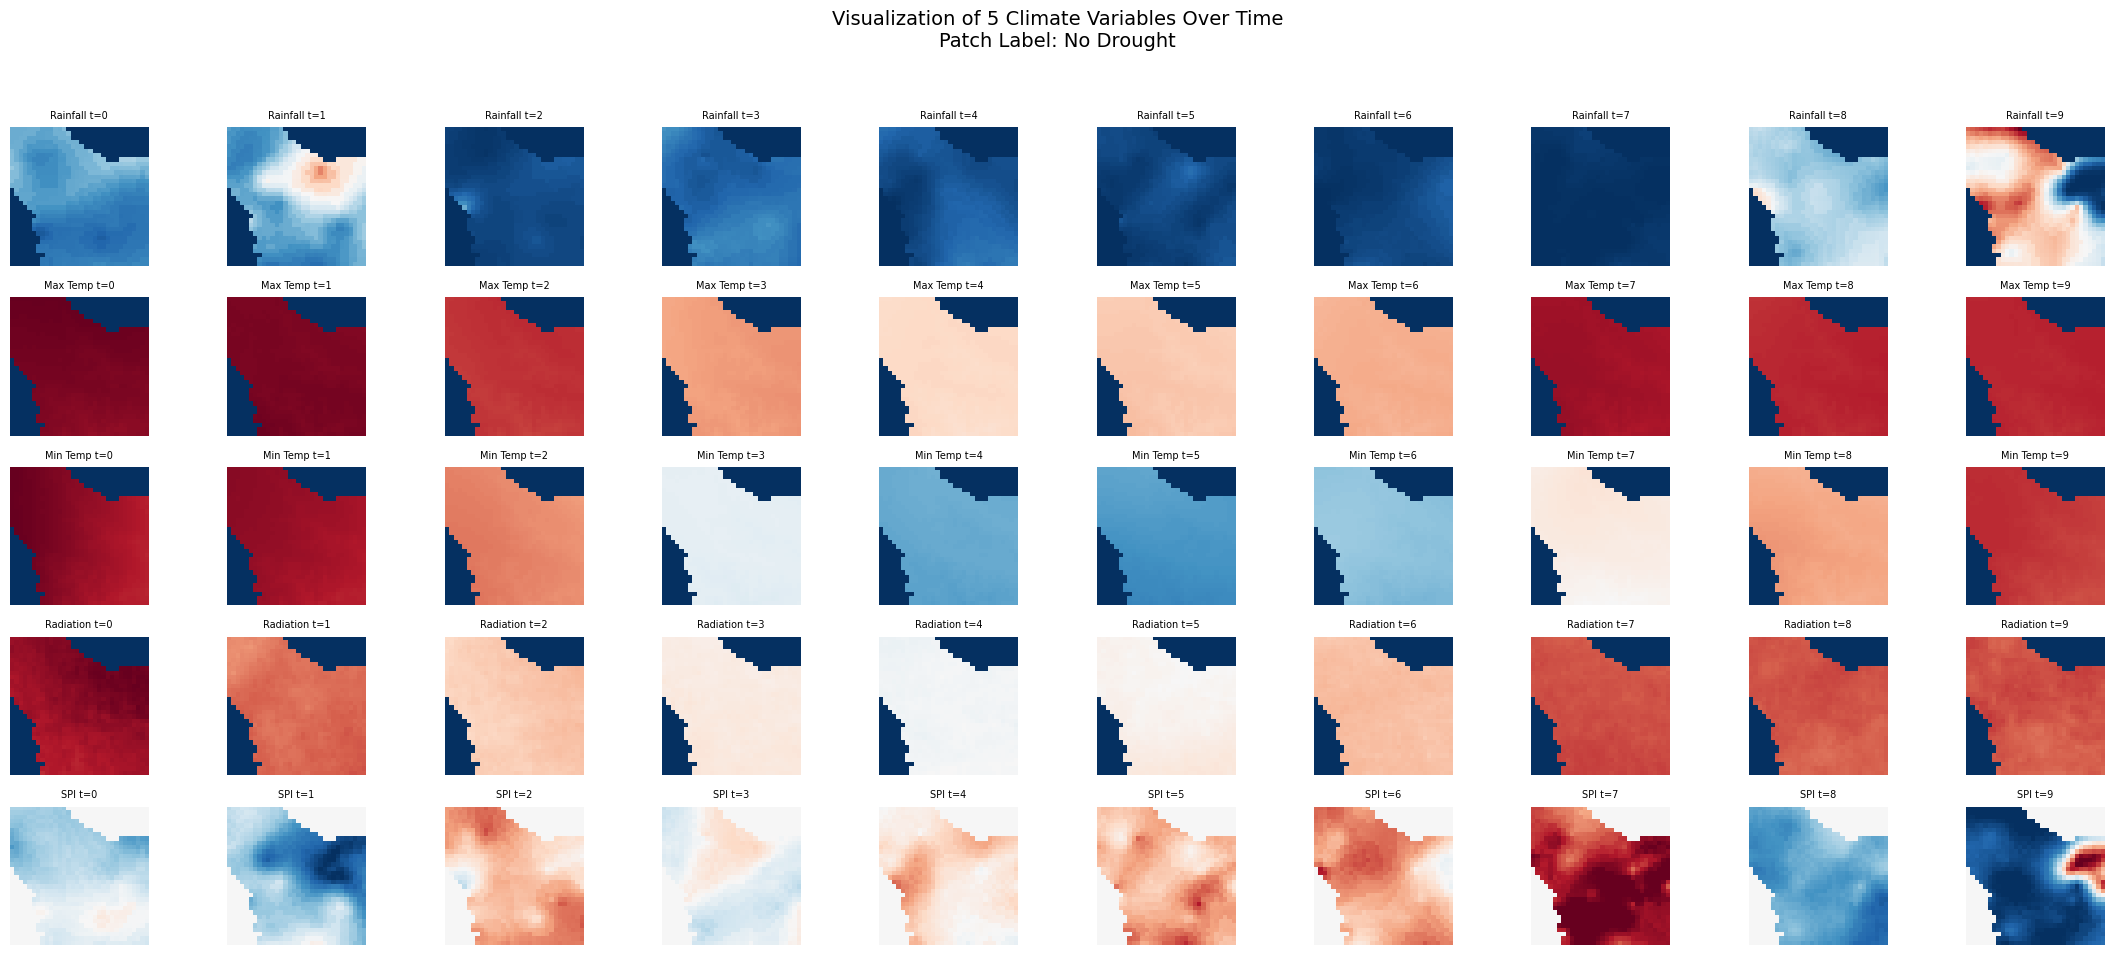

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load sample patch
patch_path = r"data\sequences\BRB\BRB_lat0_lon48_t1.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Create figure
fig, axes = plt.subplots(len(variables), 10, figsize=(22, 10))

# Plot each variable across all time steps
for row_idx, (var_name, var_data) in enumerate(variables.items()):
    for t in range(10):
        cmap = 'RdBu' if var_name == "SPI" else 'RdBu_r'
        img = axes[row_idx, t].imshow(
            var_data[t],
            cmap=cmap,
            vmin=vmin_vmax[var_name][0],
            vmax=vmin_vmax[var_name][1]
        )
        axes[row_idx, t].set_title(f"{var_name} t={t}", fontsize=7)
        axes[row_idx, t].axis('off')

# Add a shared title
drought_text = "Consecutive Drought" if label == 1 else "No Drought"
fig.suptitle(
    f"Visualization of 5 Climate Variables Over Time\nPatch Label: {drought_text}",
    fontsize=14
)

# Save figure
os.makedirs("models", exist_ok=True)
fig_path = "models/patch_visualization_all_variables.png"
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(fig_path)
plt.show()


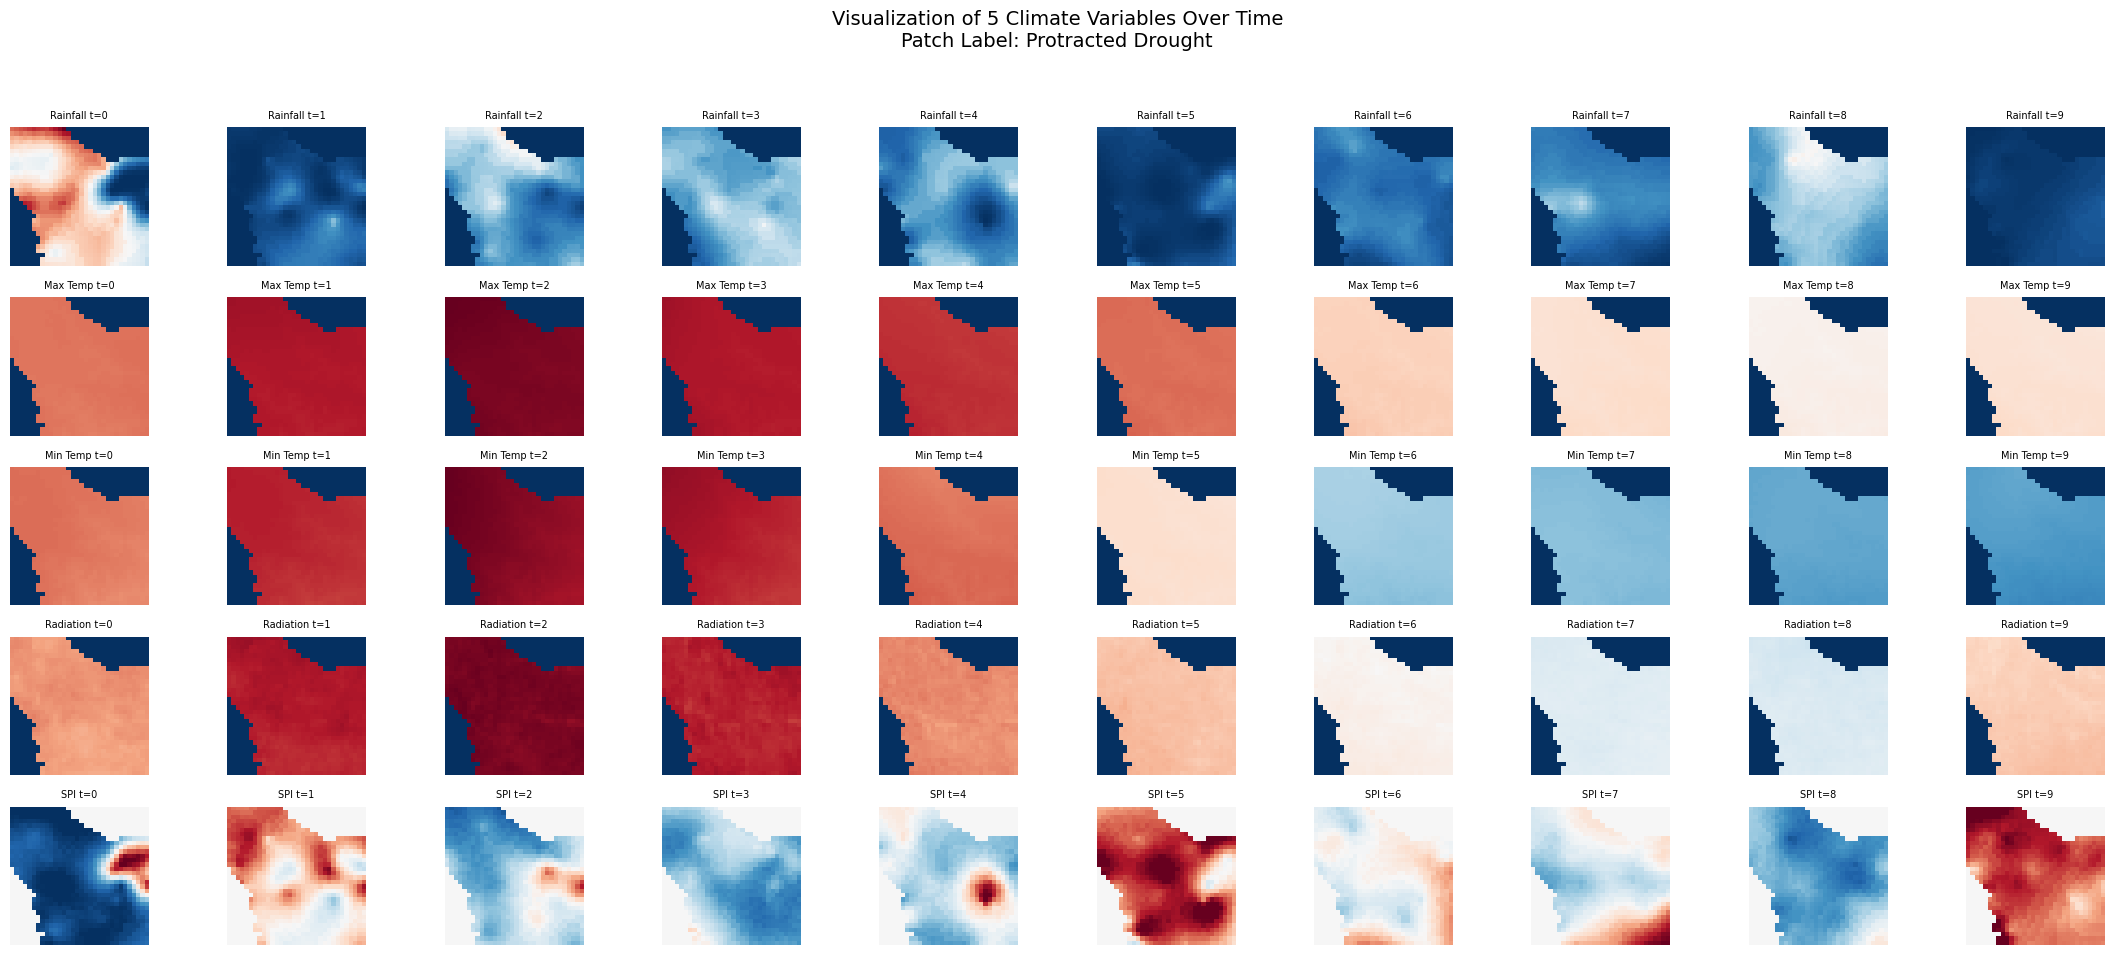

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load sample patch
patch_path = r"data\sequences\BRB\BRB_lat0_lon48_t10.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Create figure
fig, axes = plt.subplots(len(variables), 10, figsize=(22, 10))

# Plot each variable across all time steps
for row_idx, (var_name, var_data) in enumerate(variables.items()):
    for t in range(10):
        cmap = 'RdBu' if var_name == "SPI" else 'RdBu_r'
        img = axes[row_idx, t].imshow(
            var_data[t],
            cmap=cmap,
            vmin=vmin_vmax[var_name][0],
            vmax=vmin_vmax[var_name][1]
        )
        axes[row_idx, t].set_title(f"{var_name} t={t}", fontsize=7)
        axes[row_idx, t].axis('off')

# Add a shared title
drought_text = "Protracted Drought" if label == 1 else "No Drought"
fig.suptitle(
    f"Visualization of 5 Climate Variables Over Time\nPatch Label: {drought_text}",
    fontsize=14
)

# Save figure
os.makedirs("models", exist_ok=True)
fig_path = "models/patch_visualization_all_variables.png"
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(fig_path)
plt.show()


Saved figure to: models/patch_visualization_all_variables.png


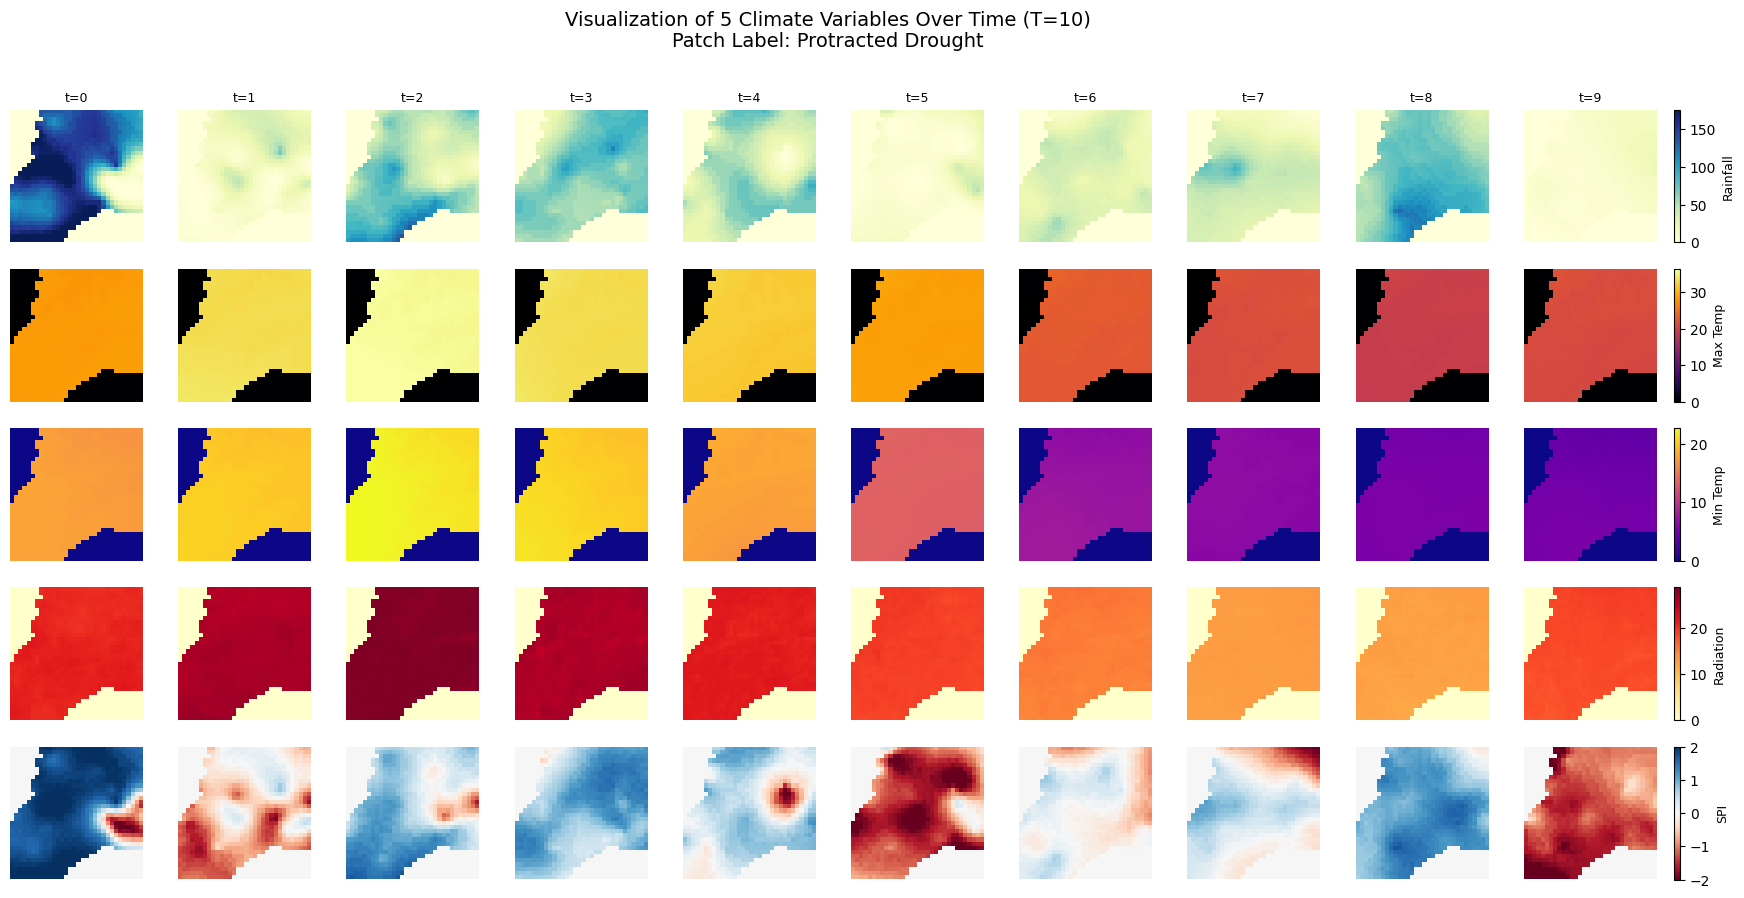

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load sample patch
patch_path = r"data\sequences\BRB\BRB_lat0_lon48_t10.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Create figure
fig, axes = plt.subplots(len(variables), 10, figsize=(22, 10))

# Plot each variable across all time steps
for row_idx, (var_name, var_data) in enumerate(variables.items()):
    for t in range(10):
        cmap = 'RdBu' if var_name == "SPI" else 'RdBu_r'
        img = axes[row_idx, t].imshow(
            var_data[t],
            cmap=cmap,
            vmin=vmin_vmax[var_name][0],
            vmax=vmin_vmax[var_name][1]
        )
        axes[row_idx, t].set_title(f"{var_name} t={t}", fontsize=7)
        axes[row_idx, t].axis('off')

# Add a shared title
drought_text = "Protracted Drought" if label == 1 else "No Drought"
fig.suptitle(
    f"Visualization of 5 Climate Variables Over Time\nPatch Label: {drought_text}",
    fontsize=14
)

# Save figure
os.makedirs("models", exist_ok=True)
fig_path = "models/patch_visualization_all_variables.png"
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(fig_path)
plt.show()


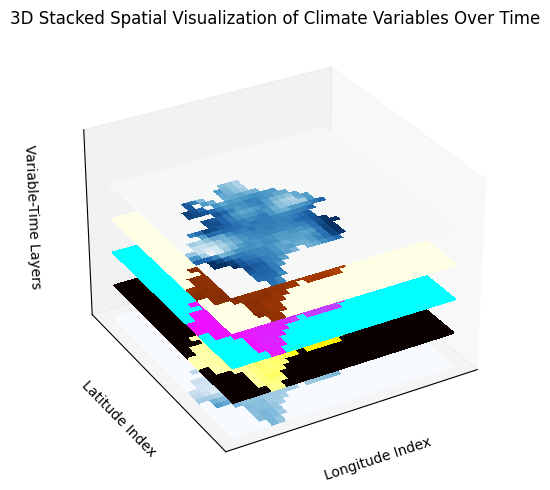

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

# Load sample patch
patch_path = r"data\sequences\NET\NET_lat0_lon0_t4.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Prepare figure
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection='3d')

# Constants
time_steps = 10
variables_list = list(variables.keys())
colors_map = {
    "Rainfall": "Blues",
    "Max Temp": "hot",
    "Min Temp": "cool",
    "Radiation": "YlOrBr",
    "SPI": "RdBu"
}

# Prepare X-Y meshgrid (32x32)
x = np.arange(32)
y = np.arange(32)
x_grid, y_grid = np.meshgrid(x, y)

# Iterate through variables and time steps
for v_idx, var_name in enumerate(variables_list):
    cmap = plt.get_cmap(colors_map[var_name])
    vmin, vmax = vmin_vmax[var_name]
    
    for t in range(time_steps):
        # Z coordinate determines stacking
        z_base = v_idx * 2  # Offset each variable layer
        z_plane = np.full_like(x_grid, z_base + t * 0.1)  # small shift per time
        
        # Get variable slice
        var_slice = variables[var_name][t]
        
        # Normalize to colormap
        normed_data = (var_slice - vmin) / (vmax - vmin)
        normed_data = np.clip(normed_data, 0, 1)
        colors = cmap(normed_data)

        # Remove alpha (optional)
        colors = colors[:, :, :3]

        # Plot the surface
        ax.plot_surface(
            x_grid, y_grid, z_plane,
            facecolors=colors,
            rstride=1, cstride=1,
            antialiased=False,
            shade=False
        )

# Axis labels and settings
ax.set_xlabel('Longitude Index')
ax.set_ylabel('Latitude Index')
ax.set_zlabel('Variable-Time Layers')
ax.set_title('3D Stacked Spatial Visualization of Climate Variables Over Time')
ax.view_init(elev=30, azim=240)  # Adjust for better angle
ax.set_zlim(0, len(variables_list) * 2 + 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.tight_layout()
plt.show()


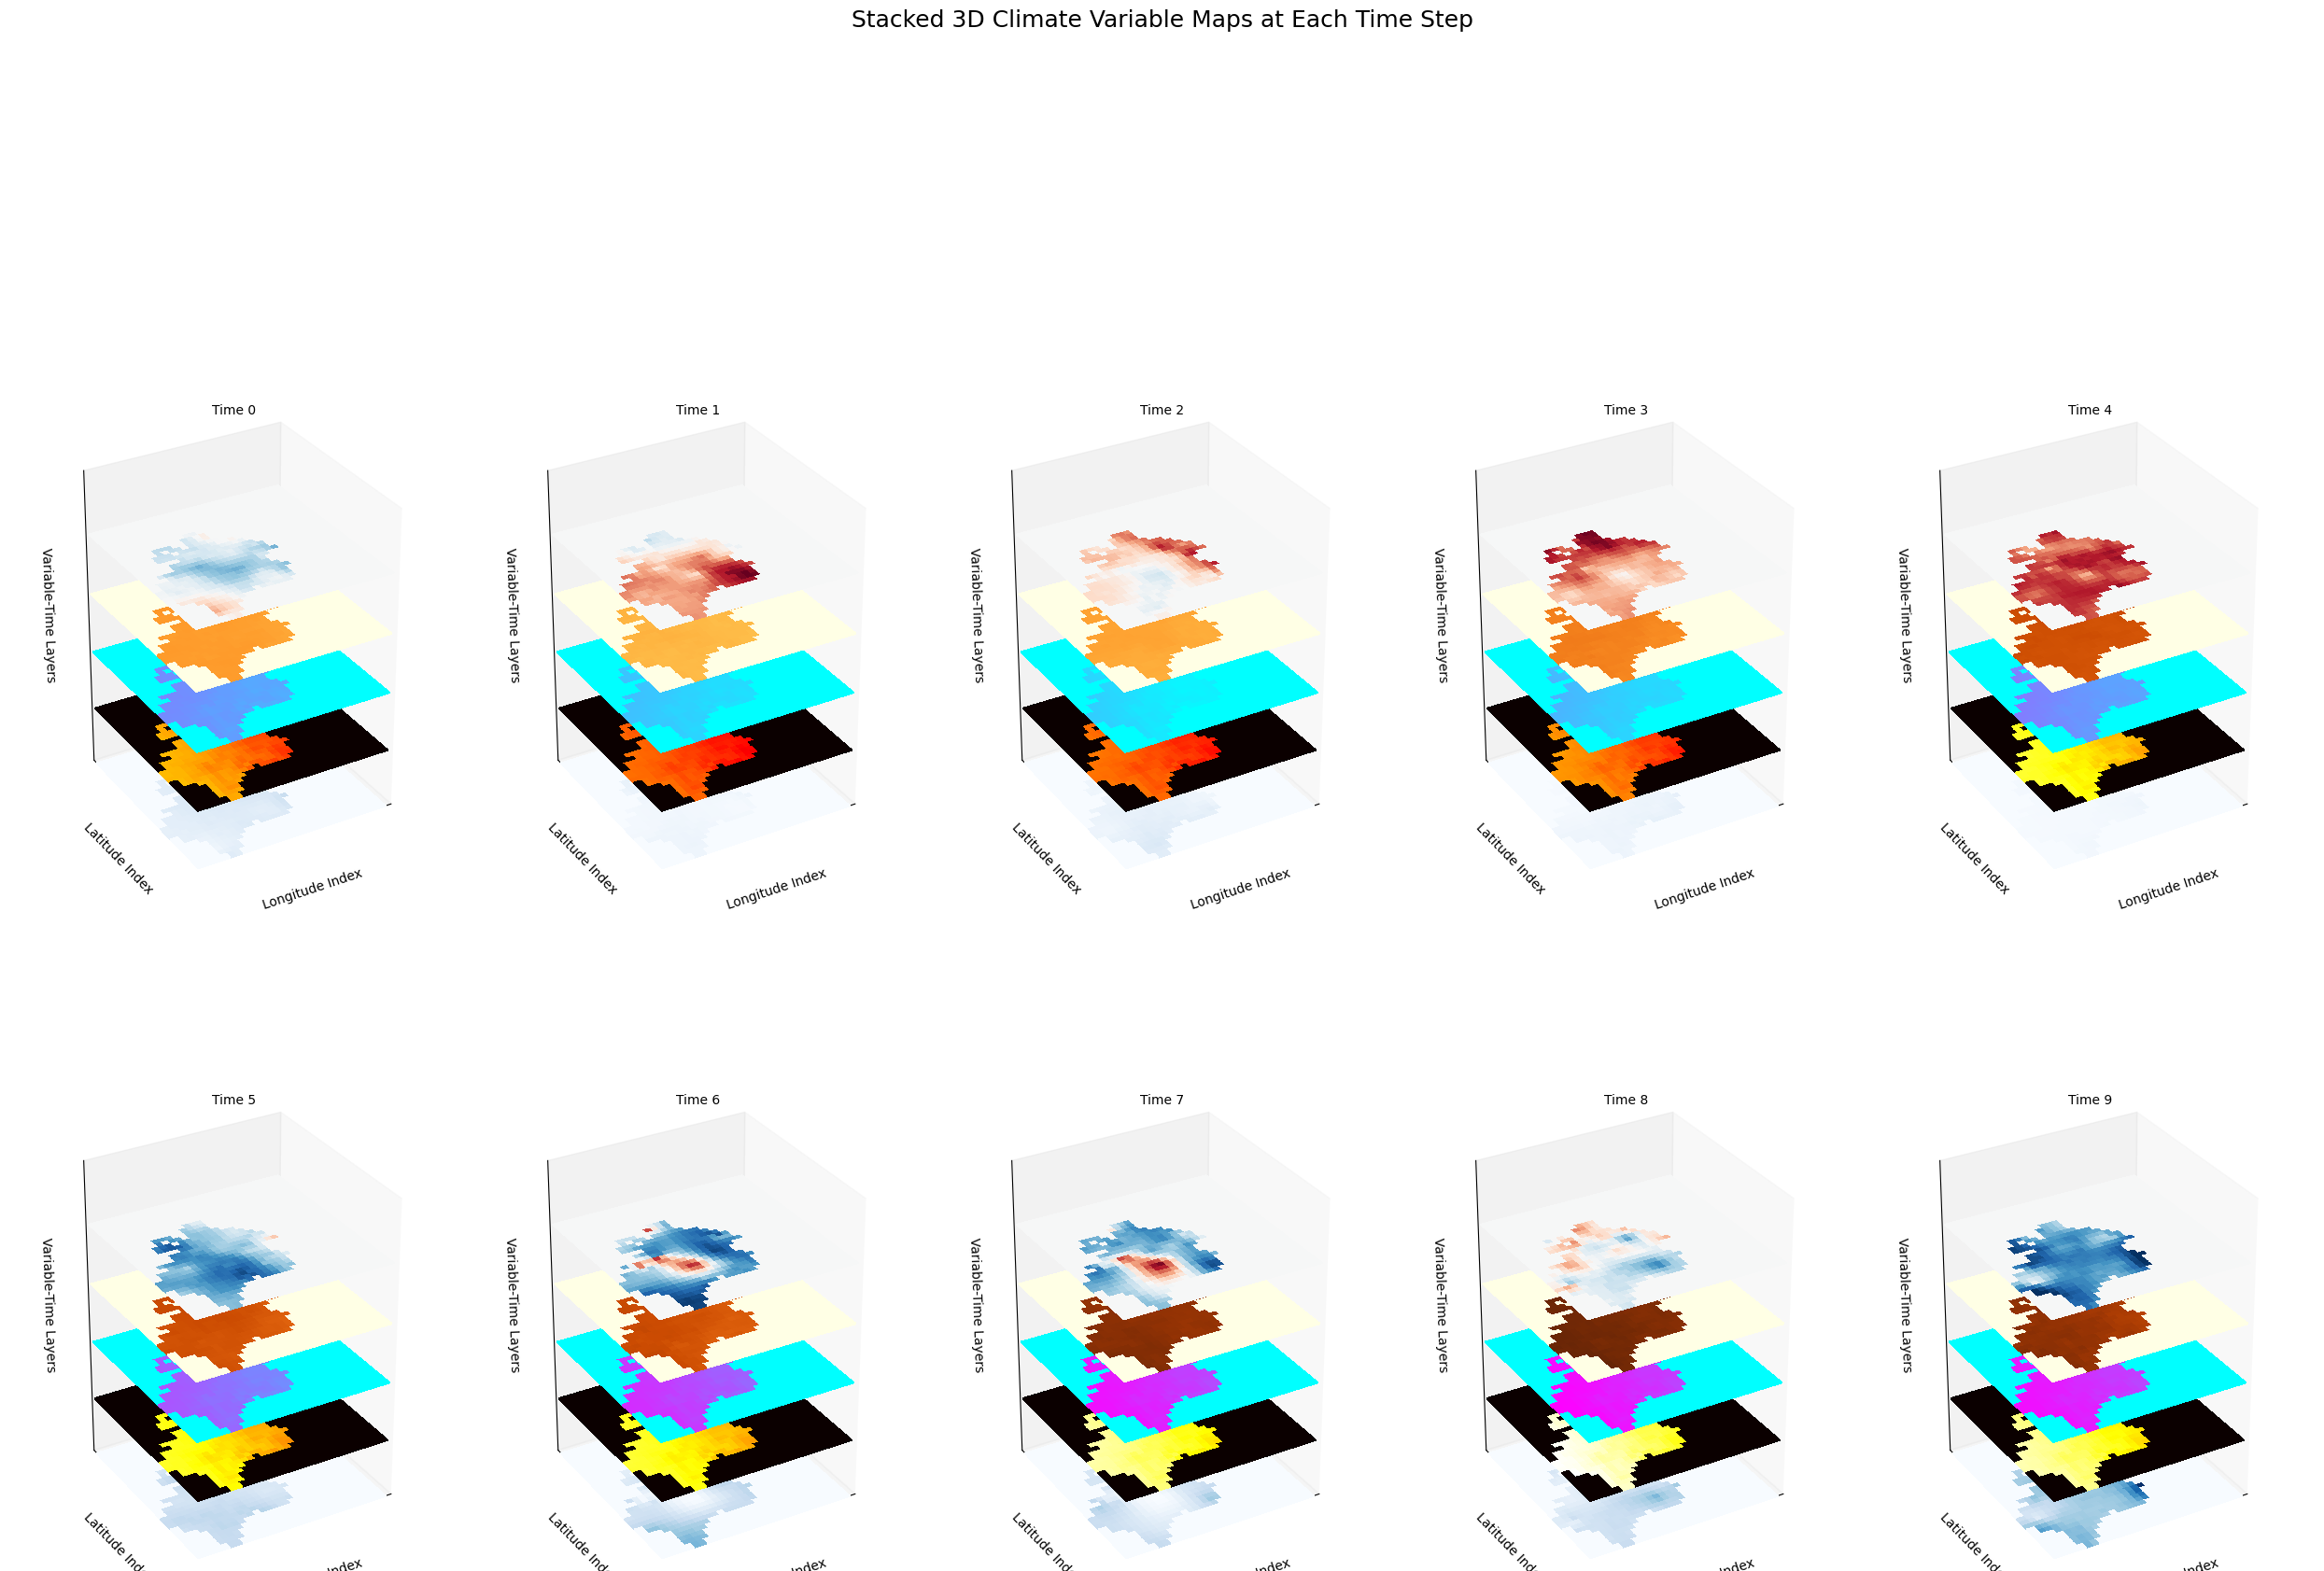

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

# Load sample patch
patch_path = r"data\sequences\NET\NET_lat0_lon0_t4.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Prepare figure

fig = plt.figure(figsize=(25, 20))  # Wider for 2x5 grid
variables_list = list(variables.keys())

# Constants
n_time_steps = 10
n_vars = len(variables_list)
colors_map = {
    "Rainfall": "Blues",
    "Max Temp": "hot",
    "Min Temp": "cool",
    "Radiation": "YlOrBr",
    "SPI": "RdBu"
}

# Prepare grid
x = np.arange(32)
y = np.arange(32)
x_grid, y_grid = np.meshgrid(x, y)

for t in range(n_time_steps):
    row = 0 if t < 5 else 1
    col = t if t < 5 else t - 5
    ax = fig.add_subplot(2, 5, t + 1, projection='3d')

    for v_idx, var_name in enumerate(variables_list):
        cmap = plt.get_cmap(colors_map[var_name])
        vmin, vmax = vmin_vmax[var_name]
        z_base = v_idx * 2

        # Get and normalize slice
        var_slice = variables[var_name][t]
        normed = (var_slice - vmin) / (vmax - vmin)
        normed = np.clip(normed, 0, 1)
        facecolors = cmap(normed)[:, :, :3]

        # Create Z-plane
        z_plane = np.full_like(x_grid, z_base)

        # Plot surface
        ax.plot_surface(
            x_grid, y_grid, z_plane,
            facecolors=facecolors,
            rstride=1, cstride=1,
            antialiased=False,
            shade=False
        )

    # Aesthetics
    ax.set_xlabel('Longitude Index')
    ax.set_ylabel('Latitude Index')
    ax.set_zlabel('Variable-Time Layers')
    ax.set_title(f'Time {t}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim(0, 32)
    ax.set_ylim(0, 32)
    ax.set_zlim(0, n_vars * 2)
    ax.view_init(elev=30, azim=240)
    ax.set_box_aspect([1, 1, 1.5])
    

# Main title and layout
plt.suptitle("Stacked 3D Climate Variable Maps at Each Time Step", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()




C:\Users\Jspch\AppData\Local\Temp\ipykernel_17456\2390480820.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colors_map[var_name])


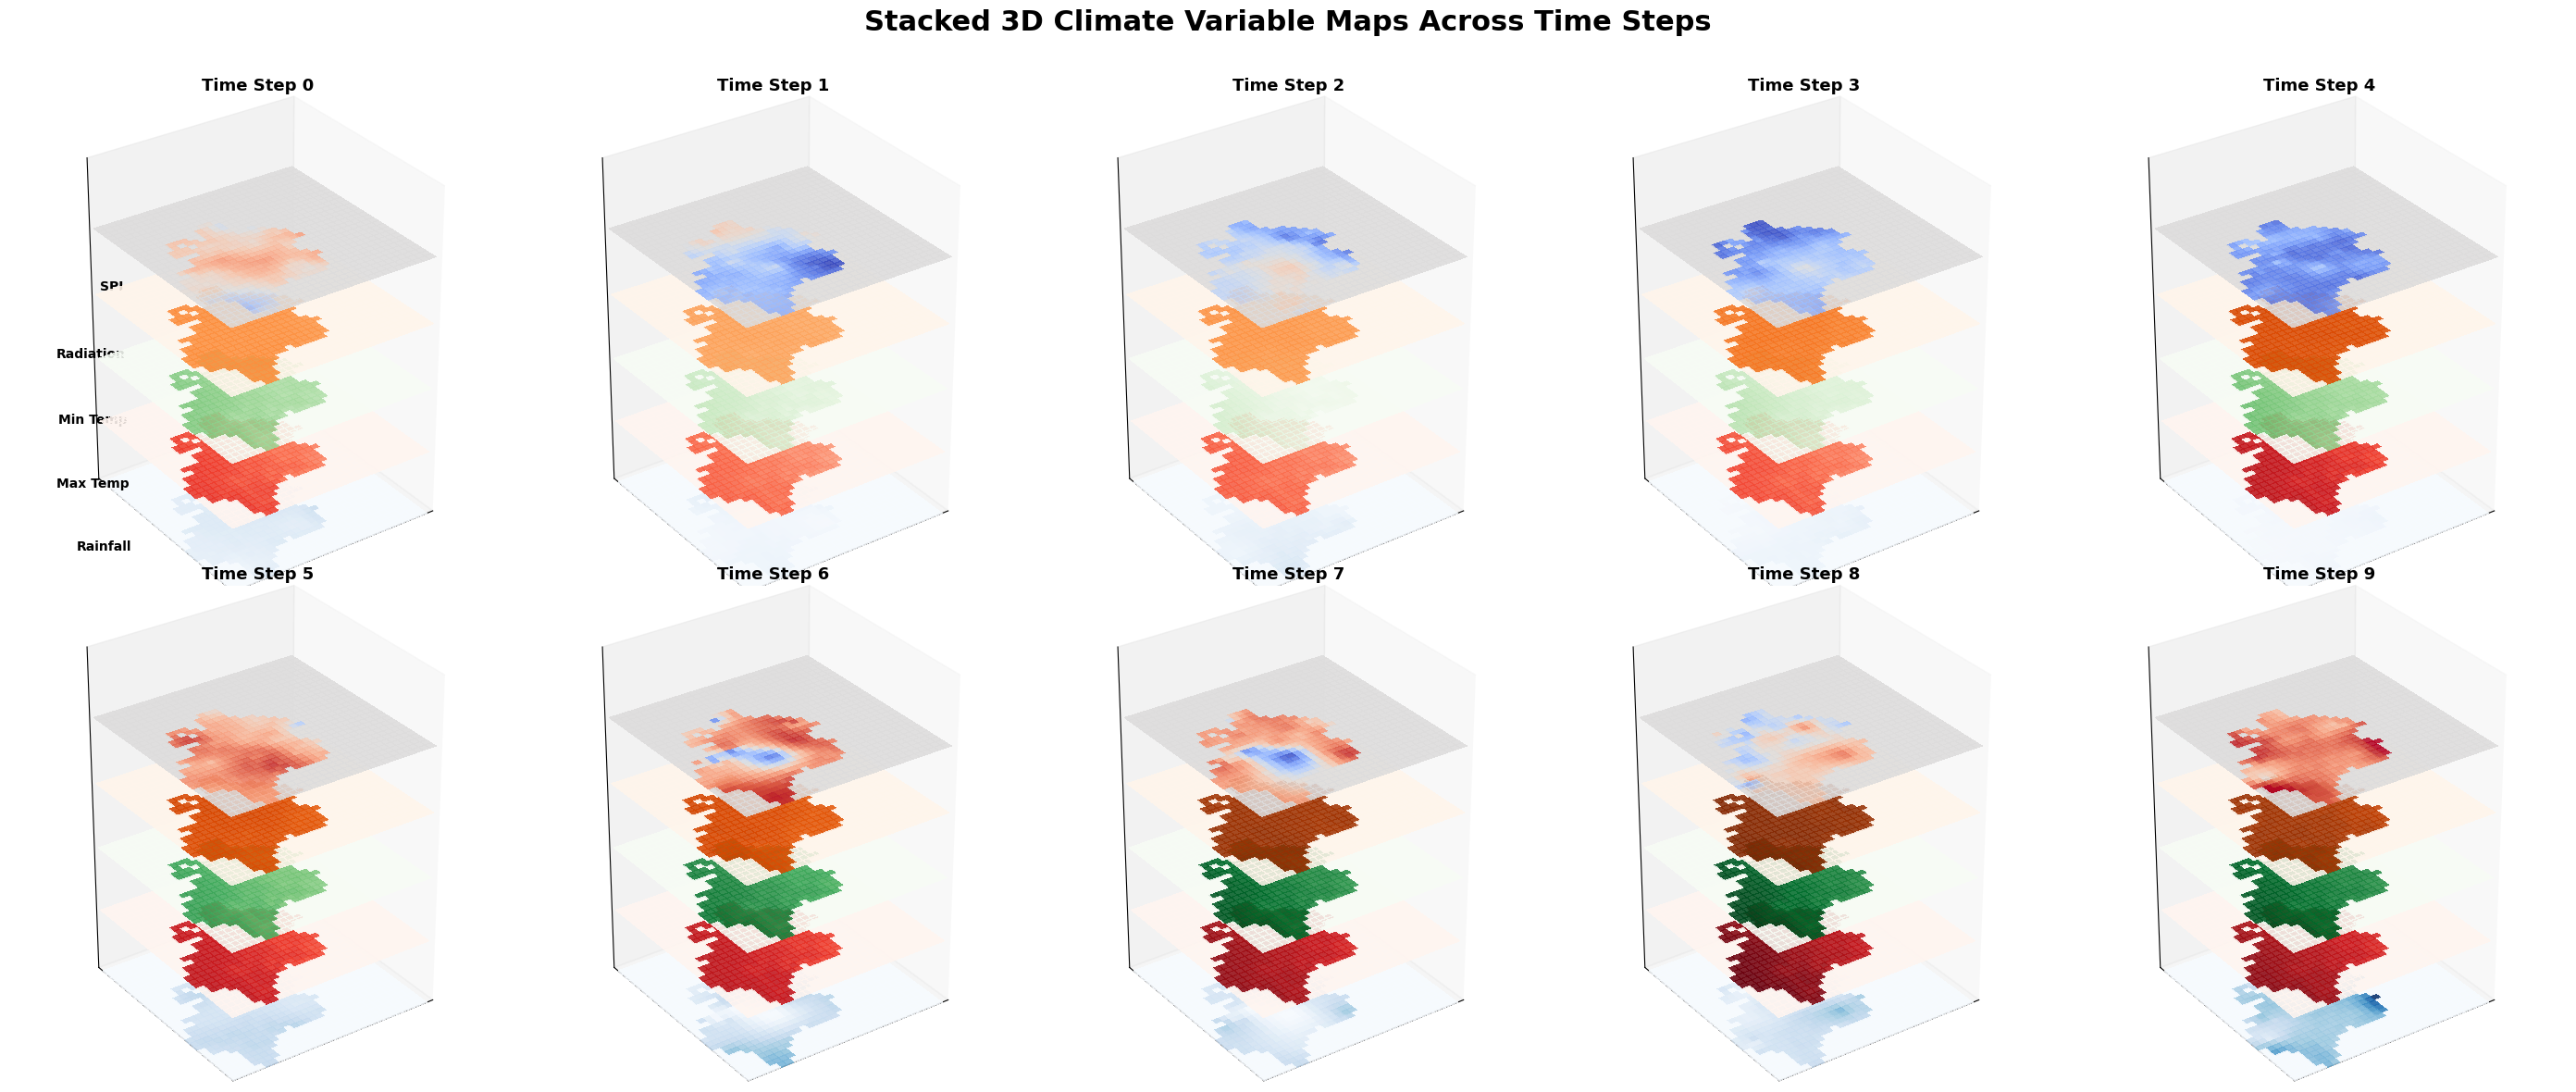

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(28, 12))
variables_list = list(variables.keys())

n_time_steps = 10
n_vars = len(variables_list)

# Define color maps for each variable
colors_map = {
    "Rainfall": "Blues",
    "Max Temp": "Reds",
    "Min Temp": "Greens",
    "Radiation": "Oranges",
    "SPI": "coolwarm"
}

# Grid for spatial surface
x = np.arange(32)
y = np.arange(32)
x_grid, y_grid = np.meshgrid(x, y)

for t in range(n_time_steps):
    ax = fig.add_subplot(2, 5, t + 1, projection='3d')

    for v_idx, var_name in enumerate(variables_list):
        cmap = cm.get_cmap(colors_map[var_name])
        vmin, vmax = vmin_vmax[var_name]
        z_offset = v_idx * 3  # Increased spacing for visual separation

        # Normalize data
        var_data = variables[var_name][t]
        normed = (var_data - vmin) / (vmax - vmin)
        normed = np.clip(normed, 0, 1)
        facecolors = cmap(normed)
        facecolors[..., 3] = 0.88  # Add transparency to RGBA

        # Plot surface for this variable
        z_plane = np.full_like(x_grid, z_offset)
        ax.plot_surface(
            x_grid, y_grid, z_plane,
            rstride=1, cstride=1,
            facecolors=facecolors,
            linewidth=0, antialiased=False, shade=False
        )

        # Add variable label on left side
        if t == 0:
            ax.text(-5, 16, z_offset, var_name, fontsize=10, va='center', ha='right', weight='bold')

    # Visual polish for each subplot
    ax.set_title(f'Time Step {t}', fontsize=13, weight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim(0, 32)
    ax.set_ylim(0, 32)
    ax.set_zlim(0, n_vars * 3)
    ax.view_init(elev=30, azim=235)
    ax.set_box_aspect([1, 1, 1.5])
    ax.grid(False)

# Main title
plt.suptitle("Stacked 3D Climate Variable Maps Across Time Steps", fontsize=22, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


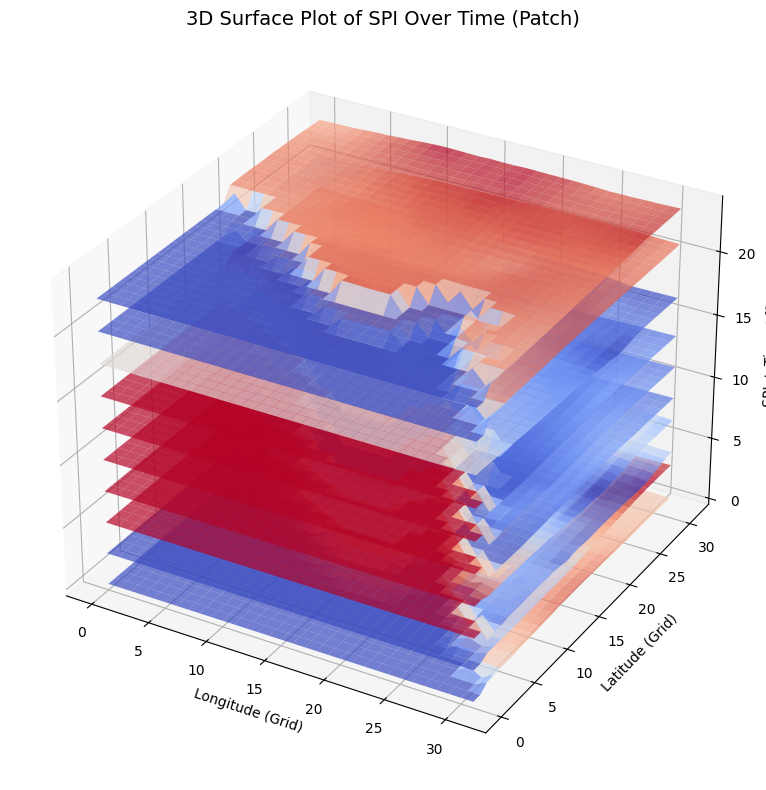

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt

# Load sample patch
patch_path = r"data\sequences\CYP\CYP_lat0_lon16_t2.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Choose a variable to visualize in 3D: SPI (channel 4)
spi_series = patch[:, :, :, 4]  # (T=10, H=32, W=32)

# We'll plot mean SPI over time for the center of each patch
T, H, W = spi_series.shape
spi_3d = spi_series.reshape(T, H * W)  # Flatten each 32x32 map to a row

# Prepare 3D data
X = np.arange(W)
Y = np.arange(H)
X, Y = np.meshgrid(X, Y)
Zs = [spi_series[t] for t in range(T)]  # List of 2D frames for each time step

# Plot 3D surface over time
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for t in range(T):
    Z = Zs[t]
    ax.plot_surface(X, Y, Z + t*2.5, cmap='coolwarm', alpha=0.7)

ax.set_title("3D Surface Plot of SPI Over Time (Patch)", fontsize=14)
ax.set_xlabel("Longitude (Grid)")
ax.set_ylabel("Latitude (Grid)")
ax.set_zlabel("SPI + Time Offset")

plt.tight_layout()
plt.show()


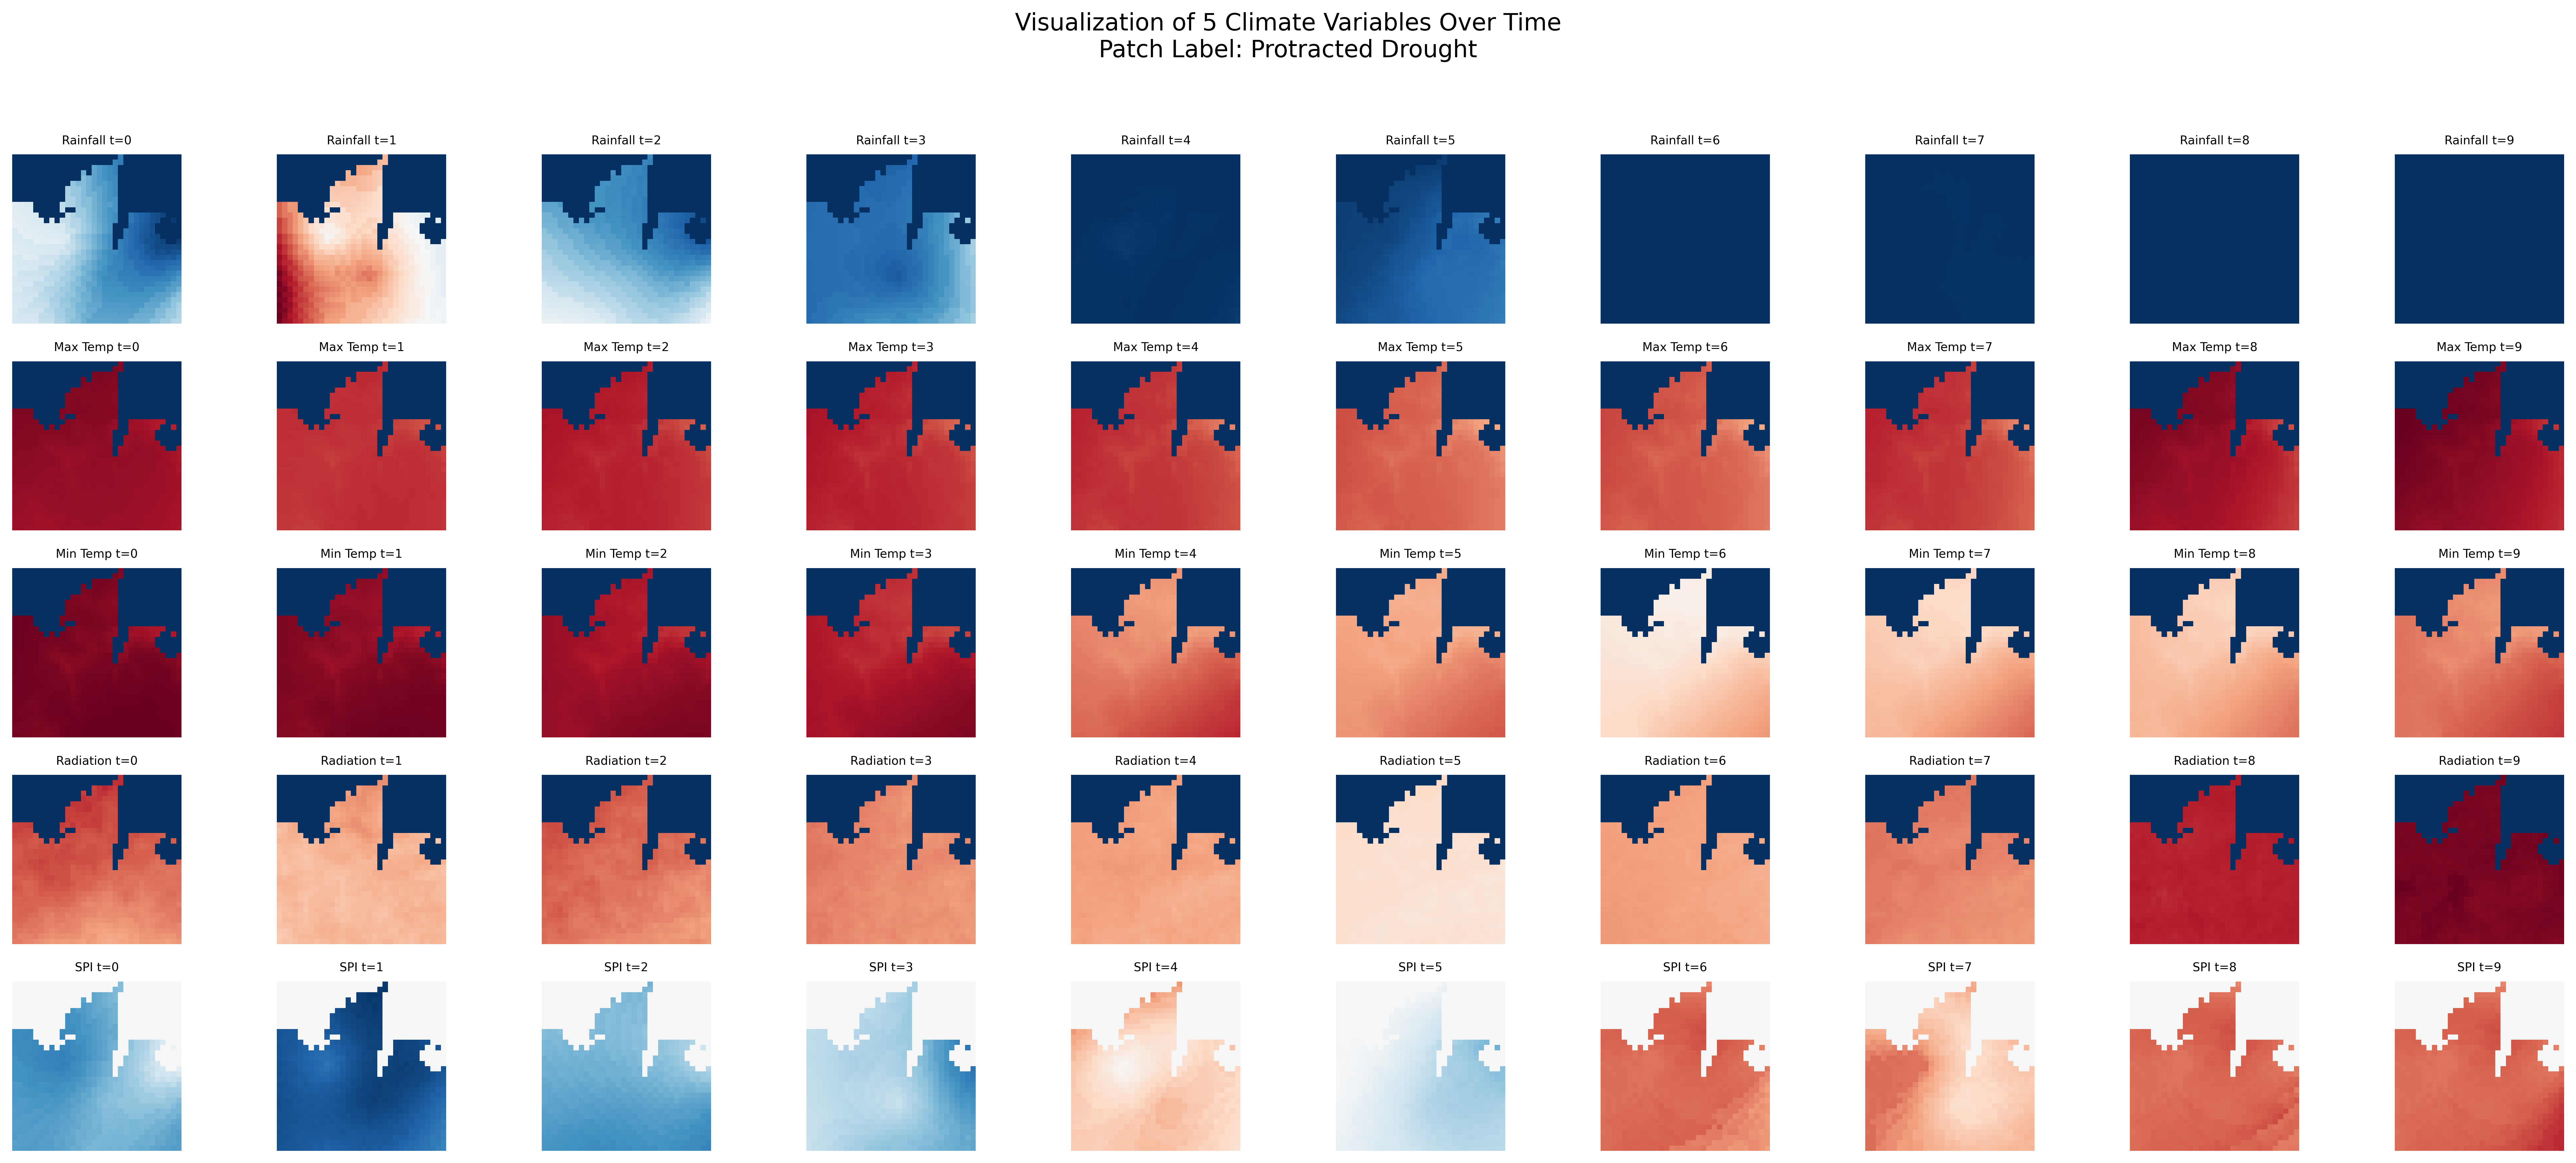

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load sample patch
patch_path = r"data\sequences\CYP\CYP_lat0_lon32_t168.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Create figure
fig, axes = plt.subplots(len(variables), 10, figsize=(22, 10), dpi=400)

# Plot each variable across all time steps
for row_idx, (var_name, var_data) in enumerate(variables.items()):
    for t in range(10):
        cmap = 'RdBu' if var_name == "SPI" else 'RdBu_r'
        img = axes[row_idx, t].imshow(
            var_data[t],
            cmap=cmap,
            vmin=vmin_vmax[var_name][0],
            vmax=vmin_vmax[var_name][1]
        )
        axes[row_idx, t].set_title(f"{var_name} t={t}", fontsize=7)
        axes[row_idx, t].axis('off')

# Add a shared title
drought_text = "Protracted Drought" if label == 1 else "No Drought"
fig.suptitle(
    f"Visualization of 5 Climate Variables Over Time\nPatch Label: {drought_text}",
    fontsize=14
)

# Save figure
os.makedirs("models", exist_ok=True)
fig_path = "models/patch_visualization_all_variables.png"
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(fig_path)
plt.show()


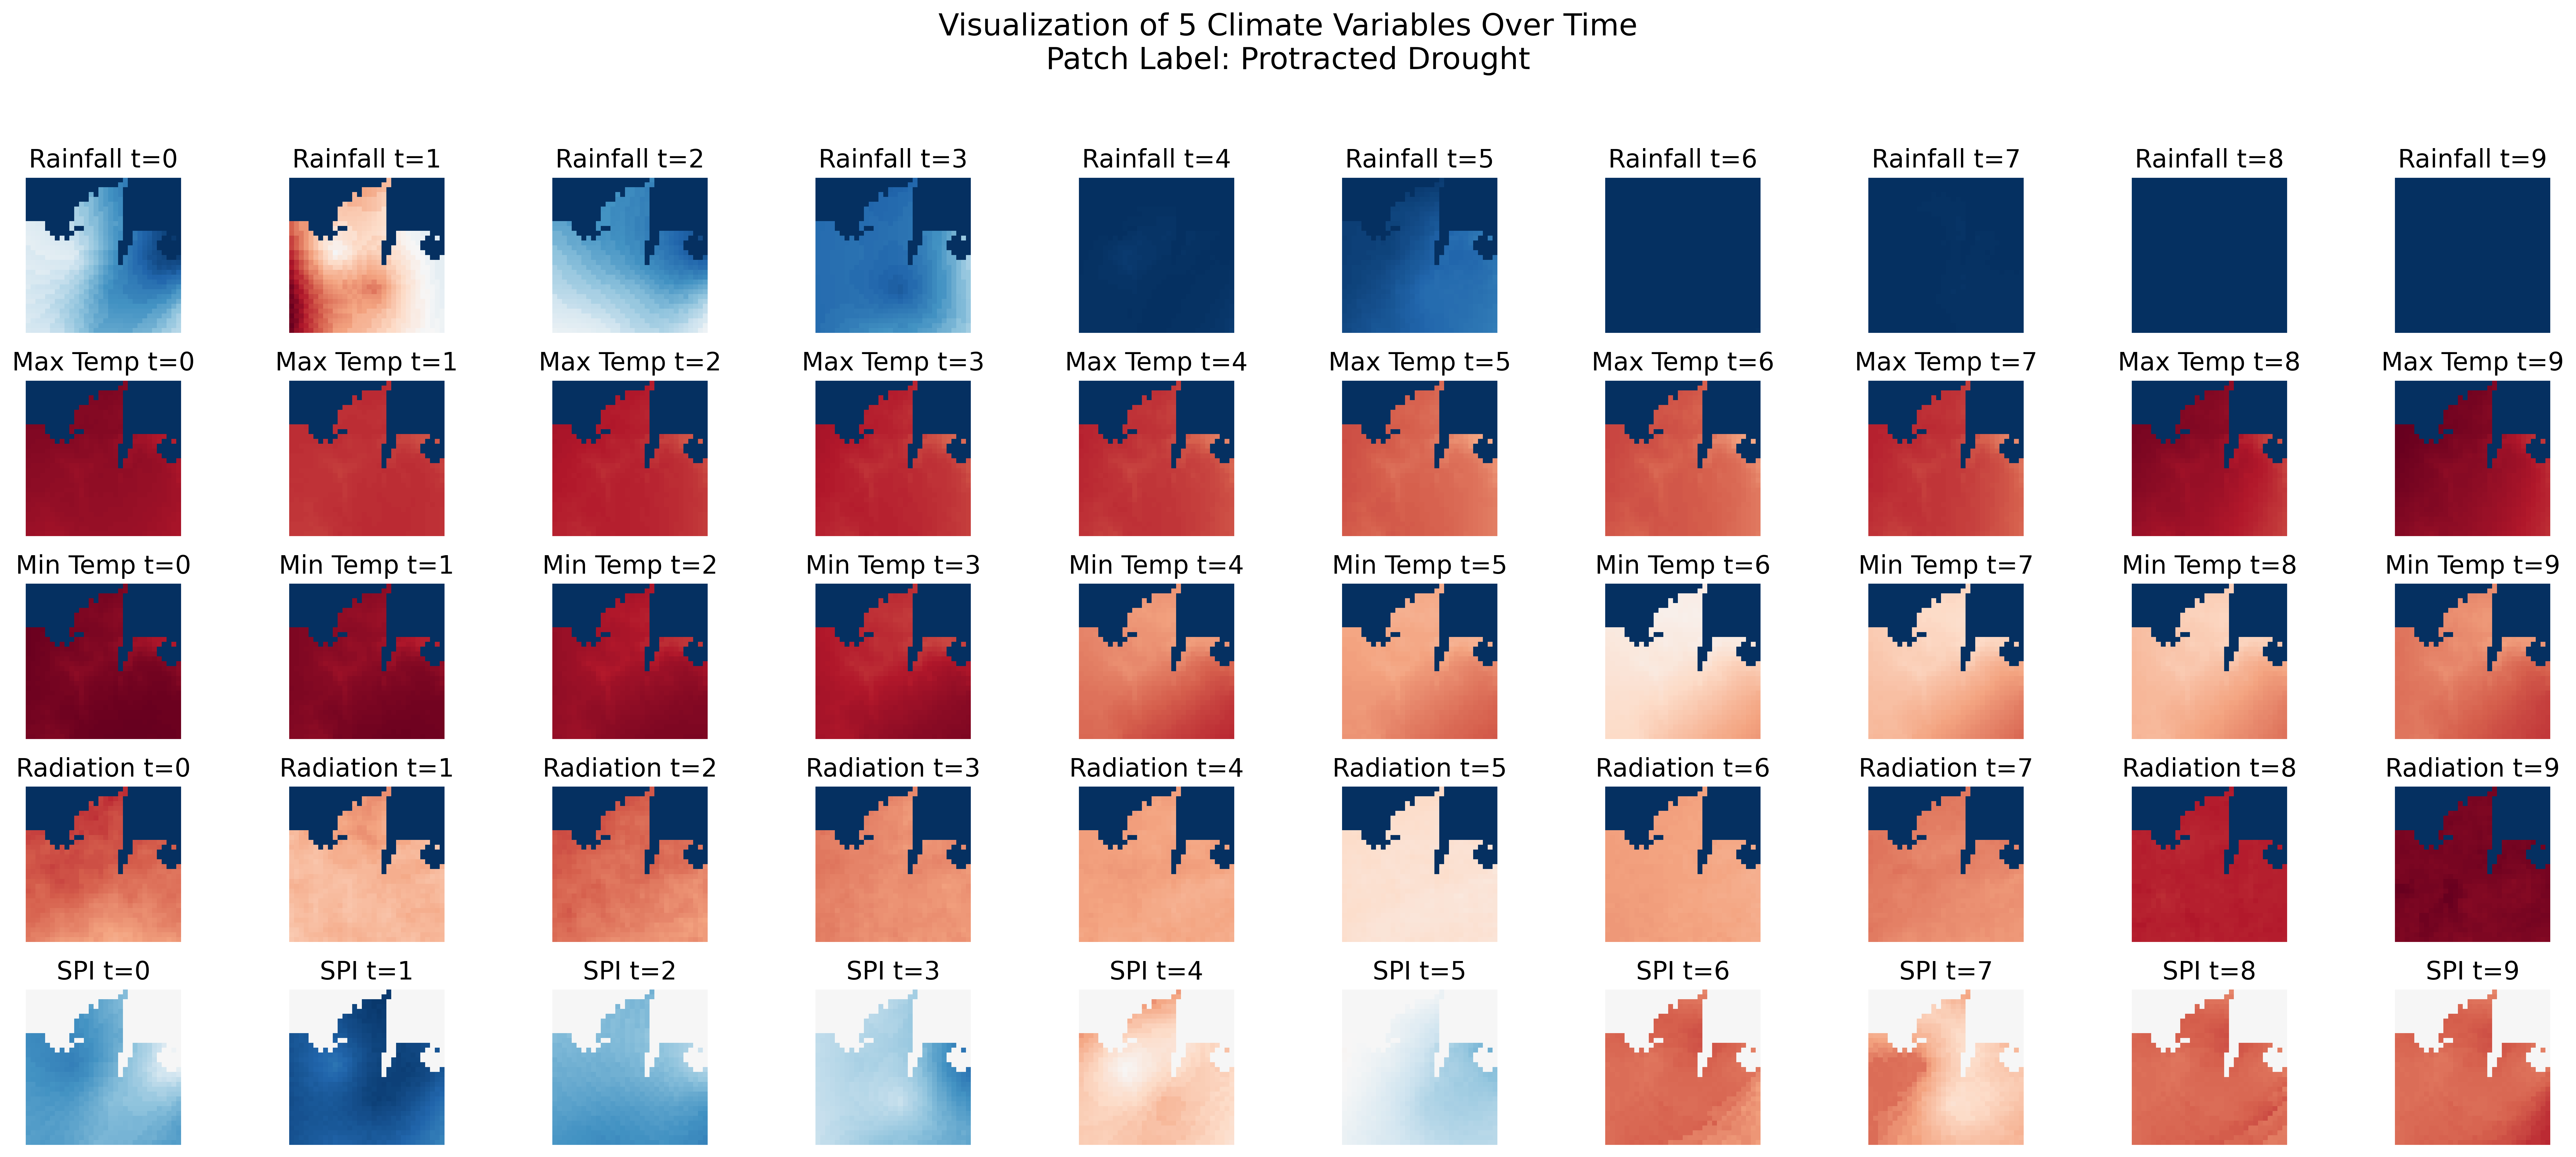

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load sample patch
patch_path = r"data\sequences\CYP\CYP_lat0_lon32_t168.npy"
label_path = patch_path.replace(".npy", "_label.npy")

patch = np.load(patch_path)  # (10, 32, 32, 10)
label = np.load(label_path)

# Extract all 5 climate variable channels (not mask channels)
variables = {
    "Rainfall": patch[:, :, :, 0],
    "Max Temp": patch[:, :, :, 1],
    "Min Temp": patch[:, :, :, 2],
    "Radiation": patch[:, :, :, 3],
    "SPI": patch[:, :, :, 4]
}

# Define vmin/vmax for consistent color scaling
vmin_vmax = {
    "Rainfall": (0, np.max(patch[:, :, :, 0])),
    "Max Temp": (np.min(patch[:, :, :, 1]), np.max(patch[:, :, :, 1])),
    "Min Temp": (np.min(patch[:, :, :, 2]), np.max(patch[:, :, :, 2])),
    "Radiation": (np.min(patch[:, :, :, 3]), np.max(patch[:, :, :, 3])),
    "SPI": (-2, 2)
}

# Create figure
fig, axes = plt.subplots(len(variables), 10, figsize=(22, 10), dpi=400)

# Plot each variable across all time steps
for row_idx, (var_name, var_data) in enumerate(variables.items()):
    for t in range(10):
        cmap = 'RdBu' if var_name == "SPI" else 'RdBu_r'
        img = axes[row_idx, t].imshow(
            var_data[t],
            cmap=cmap,
            vmin=vmin_vmax[var_name][0],
            vmax=vmin_vmax[var_name][1]
        )
        axes[row_idx, t].set_title(f"{var_name} t={t}", fontsize=15)   # ✅ increased fontsize
        axes[row_idx, t].axis('off')

# Add a shared title
drought_text = "Protracted Drought" if label == 1 else "No Drought"
fig.suptitle(
    f"Visualization of 5 Climate Variables Over Time\nPatch Label: {drought_text}",
    fontsize=18   # ✅ increased
)

# Save figure
os.makedirs("models", exist_ok=True)
fig_path = "models/patch_visualization_all_variables.png"
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(fig_path)
plt.show()
